In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import my_module
from players import BozoBot
from board import Board

In [42]:
tape_loc = "tapes/2025-09-02 19-02-27.csv"
tape_df = pd.read_csv(tape_loc)
successes = tape_df[tape_df["success"] == "S"].reset_index(drop=True)

In [43]:
temp_board = Board(BozoBot("W"), BozoBot("B"))
board_states = {}
for i in successes.index:
    temp_board.process_move(
        successes.loc[i, "move"], 
        colour=successes.loc[i, "colour"]
    )
    board_states[i] = [int(j) for j in temp_board.export()]
successes["board_state"] = board_states

In [44]:
def evaluate_board(board_state, time=200):
    # Uses cpp, but then takes weighted avg of the outcomes
    sub_evals = pd.Series(
        [i[1] for i in my_module.think(board_state, time, 4000000)]
    ).sort_values(ascending=(board_state[-1] == 1))
    val = (sub_evals / 2 ** (np.arange(1, len(sub_evals) + 1, 1))).sum()
    val += 3000 / 2 ** len(sub_evals) * (2 * board_state[-1] - 1) # If out of moves
    return val

In [45]:
successes["eval"] = successes["board_state"].apply(evaluate_board)

1
20
100
259
835
num nodes: 28596
1
21
100
285
939
num nodes: 37126
1
30
100
354
1338
4662
num nodes: 171870
1
22
100
339
1182
5251
num nodes: 240462
1
39
100
456
1815
num nodes: 65889
1
21
100
329
1273
5347
num nodes: 214097
1
39
100
459
1875
num nodes: 67600
1
22
100
348
1223
5334
num nodes: 248680
1
41
122
578
2627
num nodes: 111677
1
30
116
472
2037
num nodes: 94879
1
37
111
502
2203
num nodes: 92635
1
30
105
421
1681
num nodes: 73560
1
35
109
465
1998
num nodes: 84990
1
29
116
456
1983
num nodes: 89918
1
40
112
528
2370
num nodes: 97505
1
28
115
455
1796
num nodes: 86005
1
39
133
625
2866
num nodes: 126241
1
34
136
580
2498
num nodes: 121236
1
41
143
687
3217
num nodes: 148035
1
35
143
621
2959
num nodes: 141339
1
41
163
789
3779
num nodes: 183210
1
40
167
758
3737
num nodes: 172651
1
42
170
847
3863
num nodes: 184799
1
40
164
734
3525
num nodes: 169244
1
42
151
754
3759
num nodes: 179463
1
39
162
756
3741
num nodes: 186474
1
41
171
850
4210
num nodes: 215140
1
42
174
828
4098
num

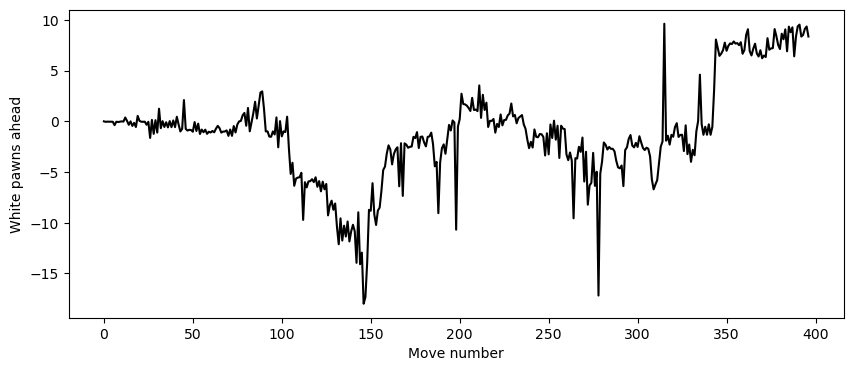

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(successes["eval"] / 100, color="black")#, marker="x")
# ax.set_xticks(successes.index, labels=successes["move"], rotation=60)
ax.set_xlabel("Move number")
ax.set_ylabel("White pawns ahead")
plt.show()

In [47]:
successes["delta"] = successes["eval"] - successes["eval"].shift(1).fillna(0)

In [49]:
successes[abs(successes["delta"]) > 500]

,colour,success,move,board_state,eval,delta
144,W,S,QB5E5,"[0, 0, 0, 3000, 0, 0, 0, 0, 0, 100, 0, 0, 100,...",-1408.801769,-512.034274
146,W,S,QE5B5,"[0, 0, 0, 3000, 0, 0, 0, 0, 0, -100, 0, 0, 100...",-1798.303573,-503.871249
149,B,S,KA7A6,"[0, 900, 0, 3000, 0, 0, 0, 0, 0, 0, 0, 0, 100,...",-872.946634,516.915204
168,W,S,PD3D4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -900, 0, ...",-734.947616,-519.501670
169,B,S,QE2G2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -90...",-216.938628,518.008988
188,W,S,KC4D3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-905.562516,-505.987279
198,W,S,QH2D6,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-1068.104664,-1057.224655
199,B,S,KE8F7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-51.499628,1016.605036
264,W,S,QG8F7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -3000,...",-955.952493,-568.021156
265,B,S,KF2E3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",-363.194217,592.758276
